# K-means с нуля
Как работает этот алгоритм? 
1) Выбираются рандомные центры кластеров 
<br>
2) Считается расстояние от точек до каждого из кластеров
<br>
3) Ближайшие точки к центру кластера обьявляются принадлежащими ему
<br>
4) Для каждого кластера рассчитывается новый центр: берется среднее значение точек, входящих в кластер.
<br>
5) Процедура повторяется с пункта 2 до тех пор, пока точки перестанут переходить из одного кластера в другой

 Для начала распишем каждый пункт отдельно, далее объеденим всё в один метод

In [1]:
import numpy as np
import plotly as plt
import matplotlib.pyplot as plot
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

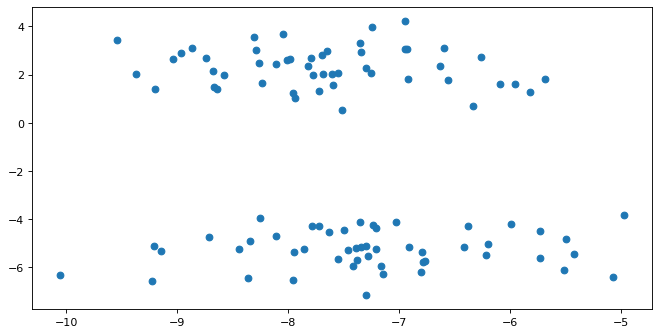

In [2]:
# Сгенерируем тестовые данные

test_data, true_clusters = make_blobs(n_samples = 100,
                  n_features = 2, 
                  centers = 2,
                  cluster_std = 0.9,
                  random_state=43,
                  shuffle = True)

plot.figure(figsize=(10, 5), dpi=80)
plot.scatter(test_data[:,0], test_data[:,1])
plot.show()

In [3]:
# А вот истинные кластера, на которых проверим наш алгоритм
true_clusters

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [4]:
main_df = pd.DataFrame(test_data, columns = ['X', 'Y'])
main_df

,X,Y
0,-6.420568,-5.149466
1,-6.599814,3.094820
2,-6.334111,0.710702
3,-5.691585,1.822127
4,-6.949306,3.058038
...,...,...
95,-8.257626,-3.961355
96,-7.280080,-5.529833
97,-6.095135,1.625376
98,-7.958505,1.220389


# Пункт 1
Генерация рандомных центров кластеров. Для нашего примера реализуем 2 кластера

In [5]:
# В качестве центров кластеров возьмем случайные 2 точки из наших данных. replace=False чтобы не взять одинаковые
np.random.seed(42)
centers = test_data[np.random.choice(test_data.shape[0], 2, replace=False)]

centers = pd.DataFrame(centers, columns = ['X', 'Y'])
centers

,X,Y
0,-8.360228,-6.423031
1,-5.518232,-6.116511


<AxesSubplot:xlabel='X', ylabel='Y'>

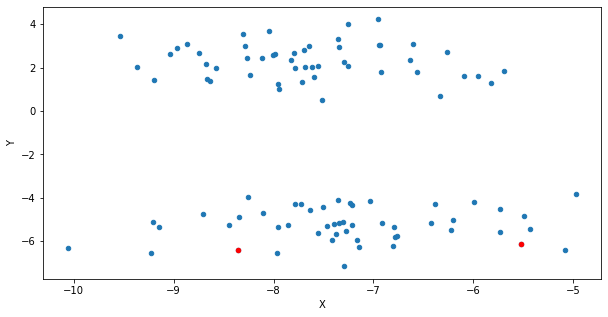

In [6]:
# Красные точки - центры кластеров
ax = main_df.plot.scatter(x='X', y='Y')
centers.plot.scatter(ax=ax, x='X', y='Y', color='red', figsize=(10, 5))

 # Пункт 2
 Расстояние между двумя точками считается по теореме пифагора - по сути, нам нужно найти гипотенузу


In [7]:
main_df['Cluster'] = None
main_df['Distance_first'] = None
main_df['Distance_second'] = None

for index, row in main_df.iterrows():
#     Для наглядности посчитаем каждый катет отдельно. В дальнейшем мы заменим это на другой удобный метод
    first_x_catet = centers.iloc[0].X - row['X']
    first_y_catet = centers.iloc[0].Y - row['Y']
    first_distance = (first_x_catet**2 + first_y_catet**2) **0.5
    main_df.at[index,'Distance_first'] = first_distance
    
    second_x_catet = centers.iloc[1].X - row['X']
    second_y_catet = centers.iloc[1].Y - row['Y']
    second_distance = (second_x_catet**2 + second_y_catet**2) **0.5
    
    main_df.at[index,'Distance_second'] = second_distance
    
#     Пункт 3. Какая точка ближе к центру - та в этот кластер и входит
    if first_distance < second_distance:
        main_df.at[index,'Cluster'] = 0
    else:
        main_df.at[index,'Cluster'] = 1

<AxesSubplot:xlabel='X', ylabel='Y'>

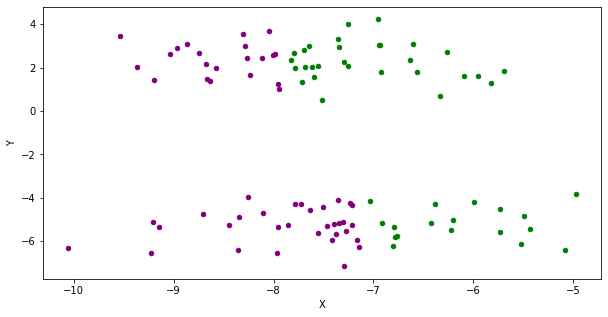

In [8]:
# Давайте посмотрим на графике, что получилось после одной итерации рассчёта расстояний 
df1 = main_df[main_df['Cluster'] ==0]
df2 = main_df[main_df['Cluster'] ==1]

ax = df1.plot.scatter(x='X', y='Y', color='purple')
df2.plot.scatter(ax=ax, x='X', y='Y', color='green', figsize=(10, 5))

# Пункт 4. Перезаписываем значения центров новых кластеров

In [9]:
centers.at[0,'X'] = main_df[main_df['Cluster'] == 0].X.mean()
centers.at[1,'X'] = main_df[main_df['Cluster'] == 1].X.mean()
centers.at[0,'Y'] = main_df[main_df['Cluster'] == 0].Y.mean()
centers.at[1,'Y'] = main_df[main_df['Cluster'] == 1].Y.mean()

<AxesSubplot:xlabel='X', ylabel='Y'>

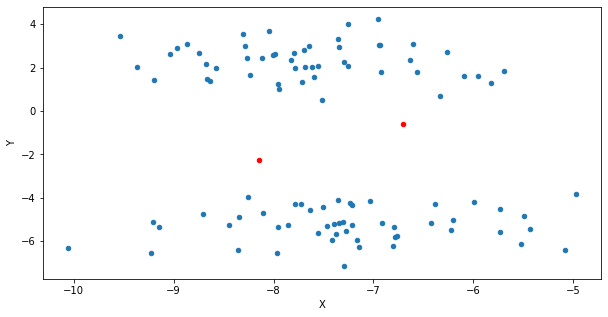

In [10]:
ax = main_df.plot.scatter(x='X', y='Y')
centers.plot.scatter(ax=ax, x='X', y='Y', color='red',  figsize=(10, 5))

как видим на графике, центры переместились!

# Пункт 5. Объеденим все перечисленные куски кода в один.  Используем numpy для более компактного кода

In [11]:
# Импортируем cdist - рассчет расстояния между точками, то же самое что делали выше
from scipy.spatial.distance import cdist


# K = количество кластеров

def kmeans_custom(data, K, max_cycles=300):
    np.random.seed(44)
    rows = data.shape[0]
    centers = data[np.random.choice(rows, K, replace=False)]
    wcss = 0
#     на всякий случай задаём 300 циклов, после которых прекращаем работу алгоритма
    cycle = 0
    
#    Задаём массив, в котором будет храниться принадлежность каждой точки к кластеру
    closest = np.zeros(rows).astype(int)
    
    
    while True:
        #   Сохраним предыдущие значения, они нам нужны для определения точки выхода из цикла
        old_closest = closest.copy()
        
        # Определение расстояния между точками и центром
        distances = cdist(data, centers)
        
        # Через эту функцию можно найти, к какому из кластеров ближе точка
        closest = np.argmin(distances, axis=1)

#         для каждого кластера обновляем центр
        for i in range(K):
            centers[i, :] = data[closest == i].mean(axis=0)

#        выходим из цикла, если точки перестали менять принадлежность к кластерам. Иными словами, как только изменения перестали происходить
        if all(closest == old_closest) or cycle == max_cycles:
#             Считаем WCSS - Within Cluster Sum of Squares. Пригодится для построения графика "локтя" в дальнейшем
            for i in range(K): 
                center_distances = np.min(cdist(data, centers), axis=1)
                wcss += sum(center_distances ** 2)
            wcss /=K
                
            break
            
        cycle+=1
            
    return closest, centers, wcss

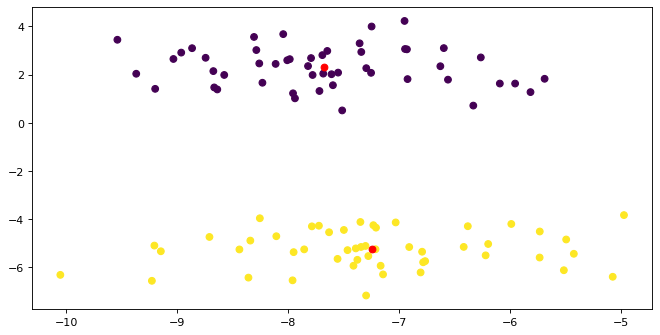

In [12]:
close, cent, wcss = kmeans_custom(test_data, K = 2)

plot.figure(figsize=(10, 5), dpi=80)
plot.scatter(test_data[:,0], test_data[:,1], c=close)
plot.scatter(cent[:,0], cent[:,1], color='red')

# А теперь сравним алгоритм с тем, что из коробки нам даёт sklearn

In [13]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

kmeans_sklearn = KMeans(n_clusters=2, random_state=44) 

kmeans_sklearn.fit(test_data)
label = kmeans_sklearn.fit_predict(test_data)
 
print("sklearn KMeans: ", label)
print("Custom KMeans:  ", close)
print("True KMeans:  ", true_clusters)

sklearn KMeans:  [0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1]
Custom KMeans:   [1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1
 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0]
True KMeans:   [1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1
 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0]


Великолепно! Истинные кластеры при генерации данных, наш самописный k-means и коробочный дают одни и те же ответы (в случае с коробочным
нули вместо единиц, но это не имеет значения)

# Выбор количества кластеров
Сколько кластеров нам нужно? Elbow (метод локтя) поможет нам в этом.
Суть такова - Построим алгоритмы с различным числом кластеров, для каждой итерации сложим расстояние между центрами кластеров и принадлежащими им точками (WCSS).  Построим график, и на моменте, когда виден "перелом" - то есть резкое уменьшение wcss - это и будет оптимальным количеством кластеров.
Для эксперимента сгенерируем еще один датасет, с числом кластеров побольше

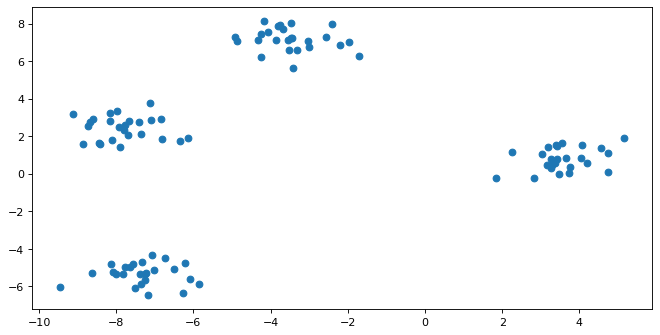

In [14]:
elbow_data, _ = make_blobs(n_samples = 100,
                  n_features = 2, 
                  centers = 4,
                  cluster_std = 0.7,
                  random_state=43,
                  shuffle = True)

plot.figure(figsize=(10, 5), dpi=80)
plot.scatter(elbow_data[:,0], elbow_data[:,1])
plot.show()

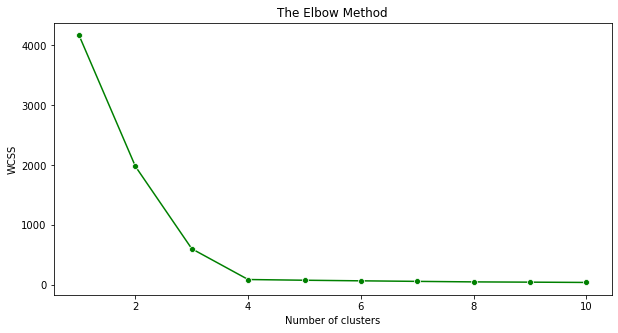

In [15]:
import seaborn as sns
# сохраняем wcss для каждой итерации. Для проверки параллельно обучим k-means из коробки
wcss_sclearn = []
wcss_custom = []

for i in range(1, 11):
    
    # коробочный k-means для сравнения
    kmeans_sclearn = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_sclearn.fit(elbow_data)
    
    _,_, wcss_cust = kmeans_custom(elbow_data, i)
    
    # inertia возвращает wcss
    wcss_sclearn.append(kmeans_sclearn.inertia_)
    wcss_custom.append(wcss_cust)

plot.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss_sclearn,marker='o',color='green')

plot.title('The Elbow Method')
plot.xlabel('Number of clusters')
plot.ylabel('WCSS')
plot.show()

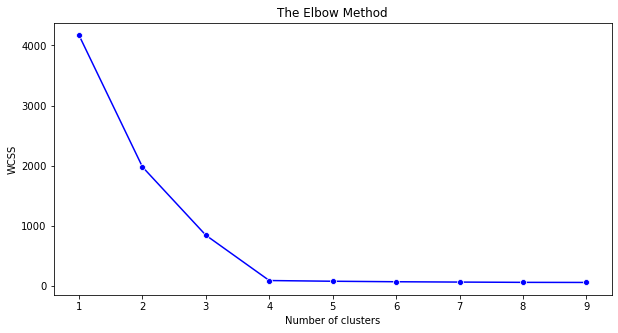

In [16]:
plot.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss_custom,marker='o',color='blue')

plot.title('The Elbow Method')
plot.xlabel('Number of clusters')
plot.ylabel('WCSS')
plot.show()

Как видим, график нашего алгоритма идеально совпадает с коробочным, значит мы всё сделали верно.